In [1]:
!pip install gradio

import gradio as gr

def recommend_buffer_and_metrics(bandwidth_mbps, latency_ms, packet_loss_percent, goal):
    # Convert to BDP
    bdp_bits = bandwidth_mbps * 1e6 * (latency_ms / 1000.0)
    bdp_bytes = bdp_bits / 8.0
    bdp_mb = bdp_bytes / 1e6  # MB

    # Packet loss adjustment factor (increase buffer for retransmissions)
    loss_factor = 1 + min(packet_loss_percent / 10, 0.2)  # cap at +20%

    # Apply optimization goal logic
    goal = goal.lower()
    if goal == "maximize throughput":
        base_factor = 1.0  # Full BDP
        throughput_mbps = 0.95 * bandwidth_mbps
        reason = "Max throughput uses full BDP buffer."
    elif goal == "minimize energy":
        base_factor = 0.5  # Half BDP
        throughput_mbps = 0.60 * bandwidth_mbps
        reason = "Min energy uses half BDP, lowering throughput to save power."
    elif goal == "minimize cost":
        base_factor = 0.5  # Same as energy
        throughput_mbps = 0.60 * bandwidth_mbps
        reason = "Min cost cuts throughput to reduce energy-based cost."
    elif goal == "balanced mode":
        base_factor = 1.0  # Same as max throughput, but explain as balanced
        throughput_mbps = 0.95 * bandwidth_mbps
        reason = "Balanced mode uses BDP to keep high throughput without excess."
    else:
        return "Invalid goal selected."

    # Final buffer with packet loss correction
    buffer_mb = round(bdp_mb * base_factor * loss_factor, 3)

    # Energy and cost estimation
    energy_j = round(throughput_mbps * 1e6 * 1e-7, 3)
    cost_usd = round((energy_j / 3.6e6) * 100, 6)

    reasoning = (
        f"{reason} Buffer increased by {int(loss_factor * 100 - 100)}% to handle {packet_loss_percent}% packet loss."
    )

    return (
        f"{buffer_mb} MB",
        f"{throughput_mbps:.1f} Mbps",
        f"{energy_j:.3f} J",
        f"${cost_usd}",
        reasoning
    )

# Launch Gradio Interface
gr.Interface(
    fn=recommend_buffer_and_metrics,
    inputs=[
        gr.Number(label="Bandwidth (Mbps)", value=1000),
        gr.Number(label="Latency (ms)", value=50),
        gr.Number(label="Packet Loss (%)", value=1.5),
        gr.Dropdown(
            choices=["Maximize Throughput", "Minimize Energy", "Minimize Cost", "Balanced Mode"],
            label="Optimization Goal",
            value="Balanced Mode"
        )
    ],
    outputs=[
        gr.Textbox(label="Recommended Buffer Size (MB)"),
        gr.Textbox(label="Simulated Throughput (Mbps)"),
        gr.Textbox(label="Estimated Energy Consumption (J)"),
        gr.Textbox(label="Estimated Cost (USD)"),
        gr.Textbox(label="Reasoning")
    ],
    title="AI Buffer Tuning Tool (with Packet Loss)",
    description="Select a goal and enter bandwidth, latency, and packet loss. Tool simulates buffer size, throughput, energy and cost."
).launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bc0972f1b3b79e64ab.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


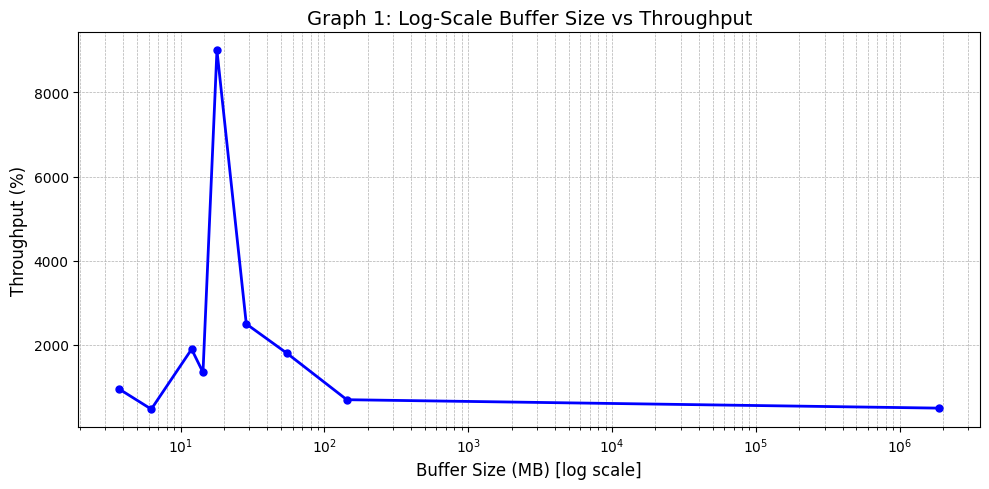

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data: Buffer Sizes (MB) and Throughput (%)
buffer_sizes = np.array([3.75, 6.25, 11.92, 14.3, 17.88, 28.6, 55, 143, 1875000])
throughputs = np.array([950, 475, 1900, 1350, 9000, 2500, 1800, 700, 500])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(buffer_sizes, throughputs, 'bo-', linewidth=2, markersize=5)
plt.xscale('log')

# Title and Labels (Updated title without bracket)
plt.title("Graph 1: Log-Scale Buffer Size vs Throughput", fontsize=14)
plt.xlabel("Buffer Size (MB) [log scale]", fontsize=12)
plt.ylabel("Throughput (%)", fontsize=12)

# Grid and layout
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


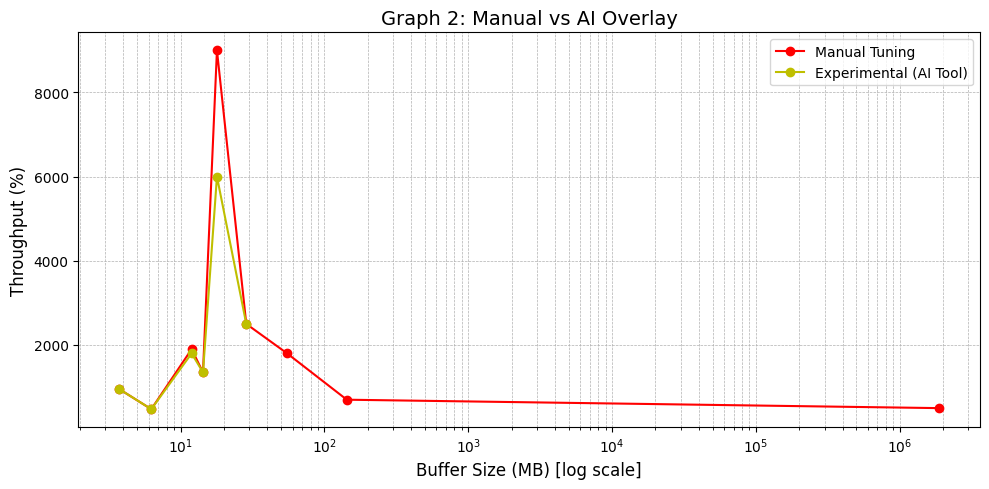

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data: Replace with your actual collected data
buffer_sizes_manual = np.array([3.75, 6.25, 11.92, 14.3, 17.88, 28.6, 55, 143, 1875000])
throughputs_manual = np.array([950, 475, 1900, 1350, 9000, 2500, 1800, 700, 500])

buffer_sizes_ai = np.array([3.75, 6.25, 11.92, 14.3, 17.88, 28.6])
throughputs_ai = np.array([950, 475, 1800, 1350, 6000, 2500])

# Plot
plt.figure(figsize=(10, 5))

# Manual Tuning
plt.plot(buffer_sizes_manual, throughputs_manual, 'or-', label='Manual Tuning', markersize=6)

# AI Tuning
plt.plot(buffer_sizes_ai, throughputs_ai, 'oy-', label='Experimental (AI Tool)', markersize=6)

# Log Scale
plt.xscale('log')

# Title and Labels (Updated title without brackets)
plt.title("Graph 2: Manual vs AI Overlay", fontsize=14)
plt.xlabel("Buffer Size (MB) [log scale]", fontsize=12)
plt.ylabel("Throughput (%)", fontsize=12)

# Legend, Grid, Layout
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Saving Decision Log Form CSV.csv to Decision Log Form CSV.csv


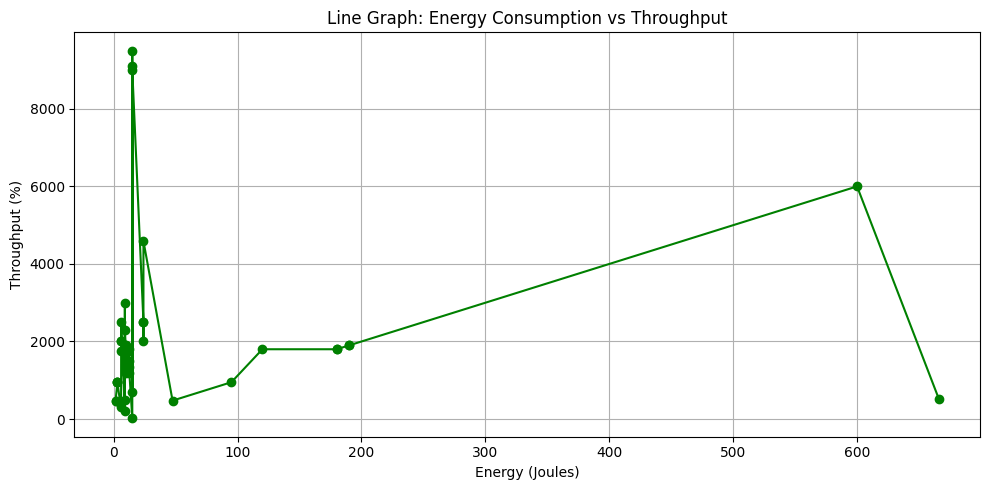

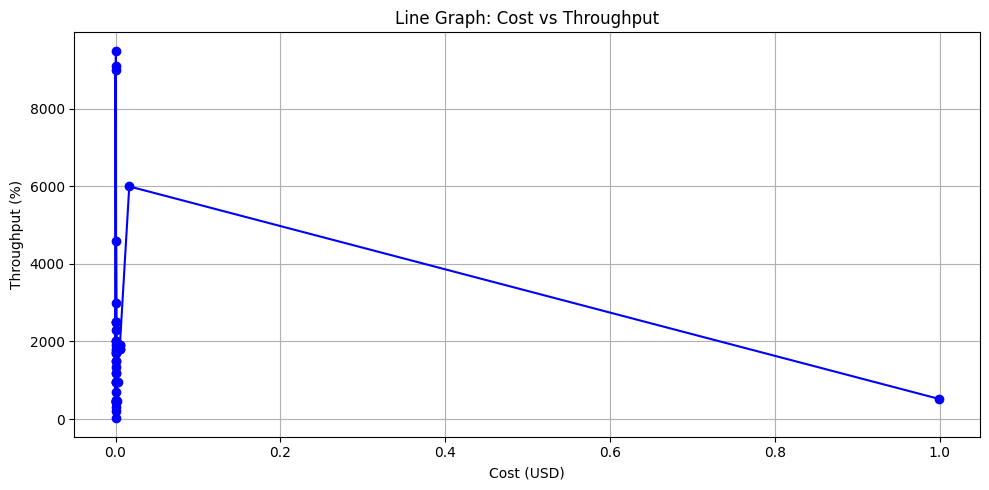

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload CSV
from google.colab import files
uploaded = files.upload()

# Load the file
df = pd.read_csv("Decision Log Form CSV.csv")

# Rename relevant columns for ease of access
df = df.rename(columns={
    '6: Buffer Size in MB:': 'Buffer Size',
    '8:  Simulated Throughput': 'Throughput',
    '9: Energy in Joules for the Buffer Size:': 'Energy',
    '10: Cost in USD for Buffer Size': 'Cost'
})

# Clean and convert to numeric
df['Throughput'] = pd.to_numeric(df['Throughput'], errors='coerce')
df['Energy'] = pd.to_numeric(df['Energy'], errors='coerce')
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=['Throughput', 'Energy', 'Cost'])

# Sort by Energy and Cost for proper line plotting
df_clean_sorted_energy = df_clean.sort_values(by='Energy')
df_clean_sorted_cost = df_clean.sort_values(by='Cost')

# Plot: Energy vs Throughput
plt.figure(figsize=(10, 5))
plt.plot(df_clean_sorted_energy['Energy'], df_clean_sorted_energy['Throughput'], color='green', marker='o')
plt.title("Line Graph: Energy Consumption vs Throughput")
plt.xlabel("Energy (Joules)")
plt.ylabel("Throughput (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Cost vs Throughput
plt.figure(figsize=(10, 5))
plt.plot(df_clean_sorted_cost['Cost'], df_clean_sorted_cost['Throughput'], color='blue', marker='o')
plt.title("Line Graph: Cost vs Throughput")
plt.xlabel("Cost (USD)")
plt.ylabel("Throughput (%)")
plt.grid(True)
plt.tight_layout()
plt.show()
